In [1]:
raw_data <- read.csv("Data_SSL_Categorical.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 398684

In [2]:
final_features<-raw_data[,c("PRE_RAW_HEAT_SCORE","AGE_GROUP","AGE_CURR","LATEST_DIST","LATEST_DIST_RES",
            "DRUG_I","WEAPON_I", "RACE_CODE_CD","SEX_CODE_CD","CPD_ARREST_I","LATEST_DATE")]

In [3]:
complete_data <- final_features[complete.cases(final_features),]

In [4]:
complete_data
# PRE_RAW_HEAT_SCORE  = 0 if x < 9570 else 1

,PRE_RAW_HEAT_SCORE,AGE_GROUP,AGE_CURR,LATEST_DIST,LATEST_DIST_RES,DRUG_I,WEAPON_I,RACE_CODE_CD,SEX_CODE_CD,CPD_ARREST_I,LATEST_DATE
1,1,20-30,20-30,31,31,N,Y,BLK,M,N,2015
2,1,20-30,20-30,31,8,N,N,WHI,M,N,2016
3,1,less than 20,less than 20,31,8,N,N,WHI,M,N,2016
4,1,less than 20,less than 20,31,4,N,Y,BLK,M,Y,2016
5,1,less than 20,less than 20,31,31,N,Y,BLK,M,N,2016
6,1,less than 20,20-30,31,2,N,Y,BLK,M,N,2015
7,1,less than 20,less than 20,31,31,N,N,BLK,M,N,2015
8,1,less than 20,less than 20,31,5,N,N,BLK,M,Y,2016
9,1,less than 20,less than 20,31,2,N,Y,BLK,M,N,2016
10,1,less than 20,less than 20,31,10,N,Y,WWH,M,N,2016


In [5]:
#complete_data$PRE_RAW_HEAT_SCORE<-as.factor(complete_data$PRE_RAW_HEAT_SCORE)
complete_data$AGE_GROUP <- as.factor(complete_data$AGE_GROUP)
#complete_data$AGE_TO <- as.factor(complete_data$AGE_TO)
complete_data$AGE_CURR<- as.factor(complete_data$AGE_CURR)
complete_data$LATEST_DIST<- as.factor(complete_data$LATEST_DIST)
complete_data$LATEST_DIST_RES<- as.factor(complete_data$LATEST_DIST_RES)
complete_data$DRUG_I<- as.factor(complete_data$DRUG_I)
complete_data$WEAPON_I<- as.factor(complete_data$WEAPON_I)
complete_data$RACE_CODE_CD<- as.factor(complete_data$RACE_CODE_CD) 
complete_data$SEX_CODE_CD<- as.factor(complete_data$SEX_CODE_CD)
complete_data$CPD_ARREST_I<- as.factor(complete_data$CPD_ARREST_I)
complete_data$LATEST_DATE<- as.factor(complete_data$LATEST_DATE)

In [6]:
library("caret")
n=nrow(complete_data)
trainIndex = sample(1:n, size = round(0.7*n),replace=FALSE)
train_data = complete_data[trainIndex,] 
test_data  = complete_data[-trainIndex,] 

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [8]:
results_glm <-glm(PRE_RAW_HEAT_SCORE~.,data=train_data,family=binomial(link='logit'))

In [9]:
summary(results_glm)


Call:
glm(formula = PRE_RAW_HEAT_SCORE ~ ., family = binomial(link = "logit"), 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1071  -0.2359  -0.0434  -0.0071   4.5138  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.771e+00  6.319e-01 -12.297  < 2e-16 ***
AGE_GROUP30-40        -1.495e+00  9.058e-02 -16.507  < 2e-16 ***
AGE_GROUP40-50        -4.190e-01  9.492e-01  -0.441 0.658859    
AGE_GROUP50-60        -1.184e+00  1.550e+00  -0.764 0.444739    
AGE_GROUP60-70        -1.612e+00  1.348e+02  -0.012 0.990463    
AGE_GROUP70-80        -2.109e+00  3.957e+02  -0.005 0.995748    
AGE_GROUPless than 20  3.040e+00  2.418e-02 125.695  < 2e-16 ***
AGE_CURR30-40         -2.055e+00  6.738e-02 -30.494  < 2e-16 ***
AGE_CURR40-50         -5.403e+00  9.208e-01  -5.867 4.43e-09 ***
AGE_CURR50-60         -6.320e+00  1.379e+00  -4.583 4.59e-06 ***
AGE_CURR60-70         -1.496e+01  1.032e+02  -0.145 

Warning message:
"package 'ROCR' was built under R version 3.3.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.3.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



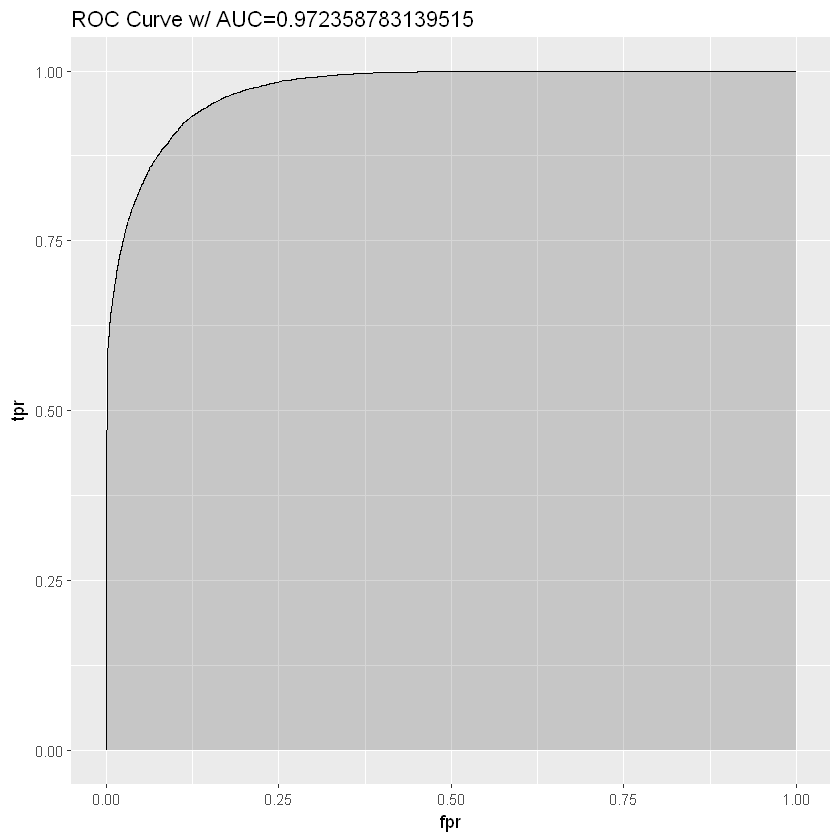

In [10]:
library(ggplot2)
predicted_values <- predict(results_glm, test_data)
library(ROCR)
pred <- prediction(predicted_values, test_data$PRE_RAW_HEAT_SCORE)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
# I know, the following code is bizarre. Just go with it.
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="results_glm")
ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
  geom_ribbon(alpha=0.2) +
  geom_line(aes(y=tpr)) +
  ggtitle(paste0("ROC Curve w/ AUC=", auc))